In [1]:
import sys
sys.path.insert(0, '/home/olysavra/datasqueezer/data_pipeline/data_pipeline_processor/')

In [2]:
import pandas as pd

In [3]:
from data_processor.data_transformator.exploratory_data_analysis import plot_random_images_from_folder
from data_processor.data_transformator.get_augmentations import random_crop_transformation, resize_transformation
from data_processor.data_transformator.add_features_to_meta import add_landmarks

In [4]:
from query_celery_tasks import get_queried_data_from_s3_by_one, get_query_for_inspection, append_meta_data_postgre
from queries_config import WOMEN_ACCESSORIES_CASUAL_QUERY, MAN_OPEN_SHOES_FALL, UNISEX_SUMMER, META_DATA_UPDATE_QUERY

In [5]:
PATH_TO_SAVE_CSV = '/home/olysavra/datasqueezer/data_pipeline/data_pipeline_processor/data/csv/'
PATH_TO_SAVE_IMAGES = '/home/olysavra/datasqueezer/data_pipeline/data_pipeline_processor/data/download'

In [6]:
women_accessories_casual_query = get_query_for_inspection.delay(WOMEN_ACCESSORIES_CASUAL_QUERY, 100, PATH_TO_SAVE_CSV)
women_accessories_casual_query.ready()
women_accessories_casual_query.get(timeout=10)

"/home/olysavra/datasqueezer/data_pipeline/data_pipeline_processor/data/csv//SELECT_*_FROM_test_WHERE_gender='Women'_AND_masterCategory='Accessories'_AND_usage='Casual'.csv"

In [7]:
women_accessories_casual_query_df = pd.read_csv("/home/olysavra/datasqueezer/data_pipeline/data_pipeline_processor/data/csv//SELECT_*_FROM_test_WHERE_gender='Women'_AND_masterCategory='Accessories'_AND_usage='Casual'.csv")

In [8]:
women_accessories_casual_query_df.head(n=10)

Unnamed: 0  index     id gender mastercategory subcategory articletype  \
0           0      0  48123  Women    Accessories       Belts       Belts   
1           1      1  47957  Women    Accessories        Bags    Handbags   
2           2      2  47359  Women    Accessories        Bags    Handbags   
3           3      3  48311  Women    Accessories   Jewellery    Bracelet   
4           4      4  21977  Women    Accessories        Bags    Handbags   
5           5      5  58183  Women    Accessories        Bags    Handbags   
6           6      6  51658  Women    Accessories     Watches     Watches   
7           7      7  44984  Women    Accessories     Watches     Watches   
8           8      8  38402  Women    Accessories       Belts       Belts   
9           9      9  35913  Women    Accessories        Bags    Handbags   

  basecolour  season  year   usage  \
0      Black  Summer  2012  Casual   
1       Blue  Summer  2012  Casual   
2      Brown  Summer  2012  Casual   
3     Bronze  Winter  2012  Casual   
4      Brown  Winter  2015  Casual   
5      White  Summer  2012  Casual   
6     Copper  Winter  2016  Casual   
7      White  Winter  2016  Casual   
8      Black  Summer  2012  Casual   
9      Black  Summer  2012  Casual   

                             productdisplayname  \
0        Fossil Women Black Huarache Weave Belt   
1                     Murcia Women Blue Handbag   
2                    Baggit Women Brown Handbag   
3          Pitaraa Women Bronze Beaded Bracelet   
4             Murcia Women Casual Brown Handbag   
5                   Rocky S Women White Handbag   
6  Fossil Women Copper Chronograph Watch CH2589   
7                 Maxima Women White Dial Watch   
8           Baggit Women Hood Dabang Black Belt   
9          Peperone Women Black & White Handbag   

                                           meta_data  \
0  {'data': {'id': 48123, 'vat': 14.5, 'year': '2...   
1  {'data': {'id': 47957, 'vat': 14.5, 'year': '2...   
2  {'data': {'id': 47359, 'vat': 14.5, 'year': '2...   
3  {'data': {'id': 48311, 'vat': 14.5, 'year': '2...   
4  {'data': {'id': 21977, 'vat': 14.5, 'year': '2...   
5  {'data': {'id': 58183, 'vat': 14.5, 'year': '2...   
6  {'data': {'id': 51658, 'vat': 14.5, 'year': '2...   
7  {'data': {'id': 44984, 'vat': 14.5, 'year': '2...   
8  {'data': {'id': 38402, 'vat': 14.5, 'year': '2...   
9  {'data': {'id': 35913, 'vat': 14.5, 'year': '2...   

                           hash_key  
0  43cd917f35e5c048e8c2a850b3cdc498  
1  c1de5d1fd4fa6d9bf63ef8efbbbc2d47  
2  f6cf85a9c21b0e5fc57184c750069535  
3  0dff9955a522ad90c6a8cc6810b3e27a  
4  555dd03a11714c82c1f3cf3213845496  
5  acc66f4333314d6a46894cc3f5a226dc  
6  93530fcd0e0ac80959c2c78c8b32b766  
7  6d319e8082cfd2e5540d92317404df21  
8  d119d9ca44ae1ab518ef947b9e738ed3  
9  7c37875b8083121c17ec5d5e13da5eb3

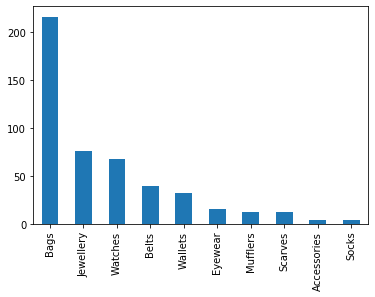

In [9]:
women_accessories_casual_query_df['subcategory'].value_counts().plot(kind='bar')

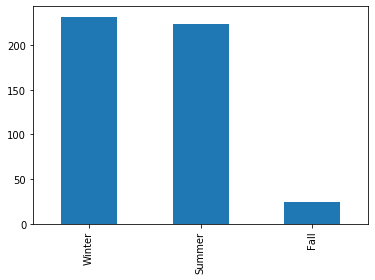

In [10]:
women_accessories_casual_query_df['season'].value_counts().plot(kind='bar')

In [11]:
women_accessories_casual_query_df['basecolour'].value_counts().plot(kind='bar')

In [12]:
folder_for_images = get_queried_data_from_s3_by_one.delay(WOMEN_ACCESSORIES_CASUAL_QUERY, 100, PATH_TO_SAVE_IMAGES)
folder_for_images.ready()
folder_for_images.get(timeout=2000)

"/home/olysavra/datasqueezer/data_pipeline/data_pipeline_processor/data/download/SELECT_*_FROM_test_WHERE_gender='Women'_AND_masterCategory='Accessories'_AND_usage='Casual'"

In [15]:
folder_for_images_path = "/home/olysavra/datasqueezer/data_pipeline/data_pipeline_processor/data/download/SELECT_*_FROM_test_WHERE_gender='Women'_AND_masterCategory='Accessories'_AND_usage='Casual'"

In [16]:
plot_random_images_from_folder(folder_for_images_path)

In [17]:
import glob
image_list = glob.glob(folder_for_images_path+'/*.jpg')

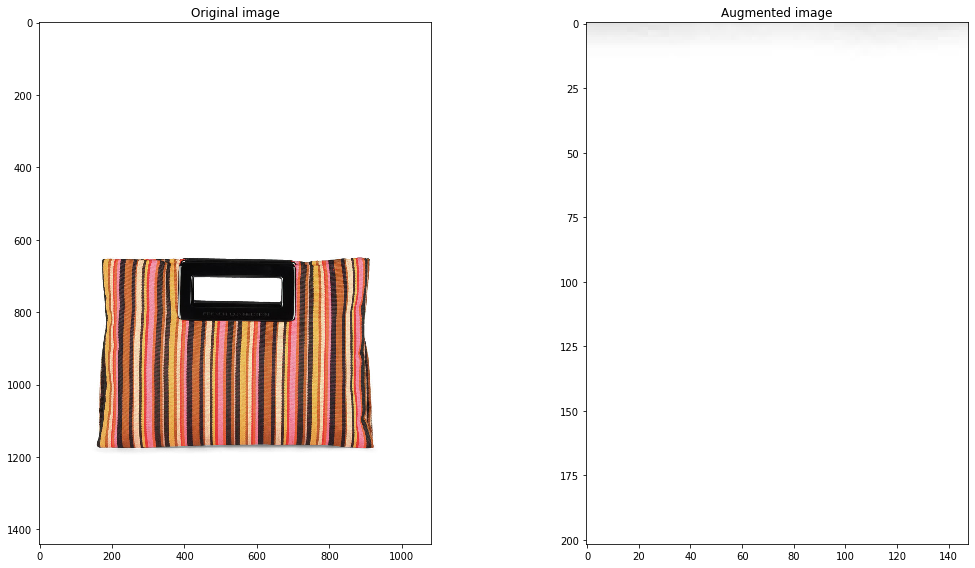

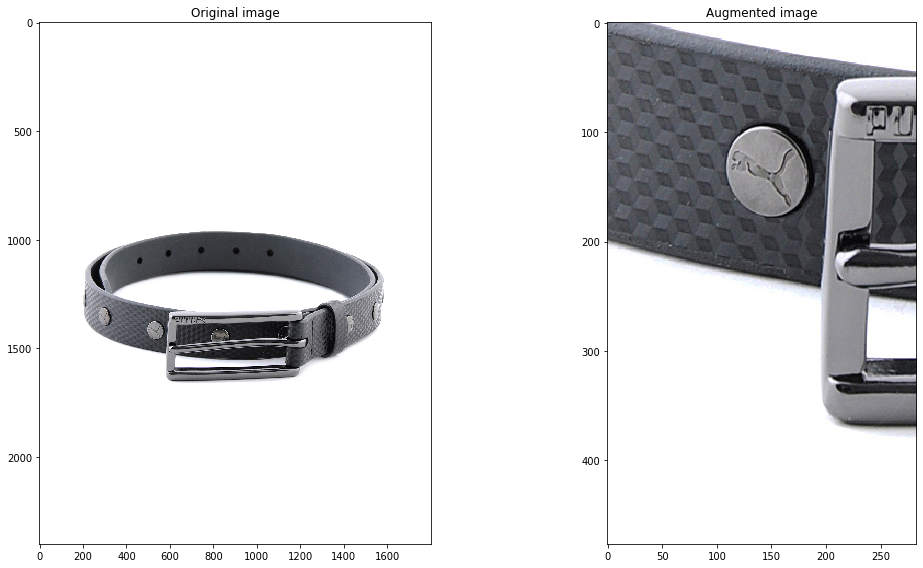

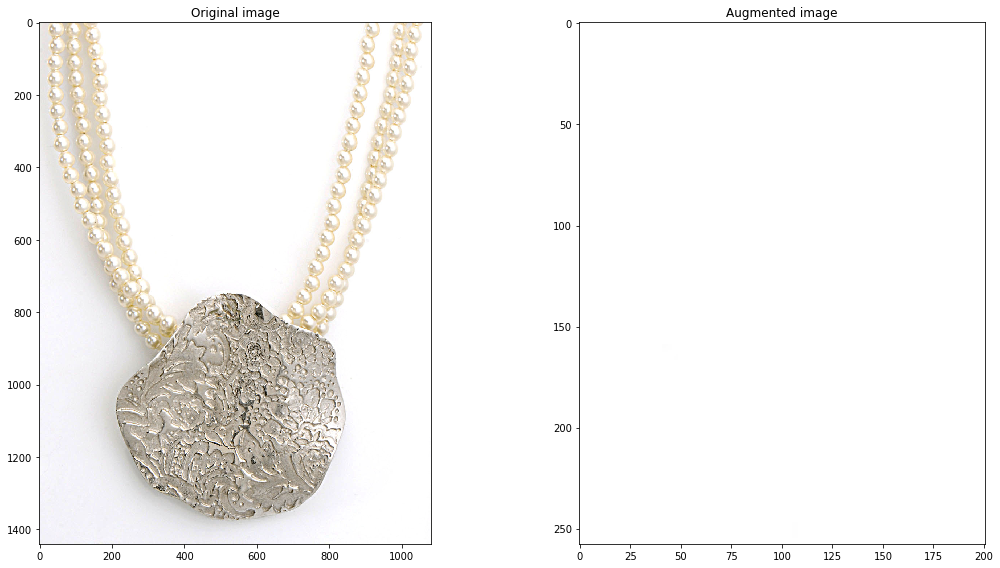

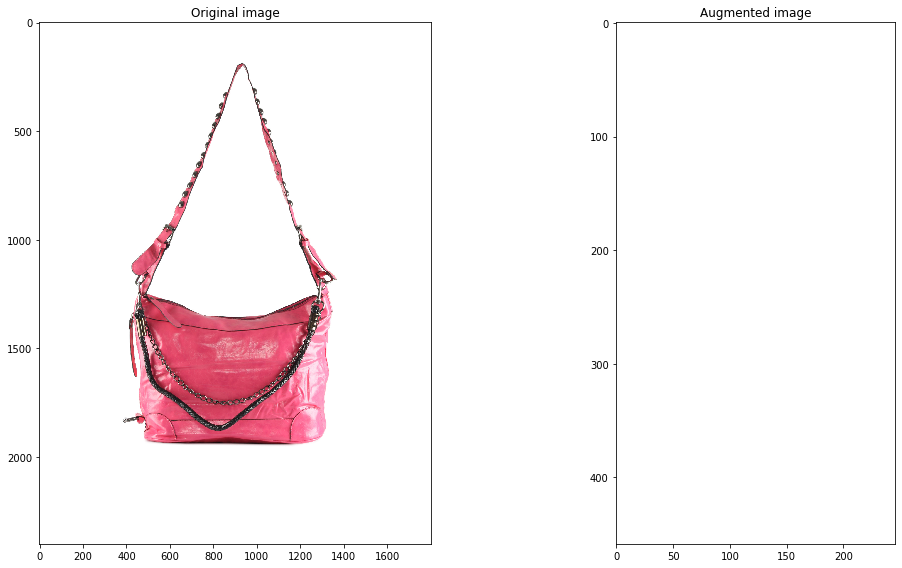

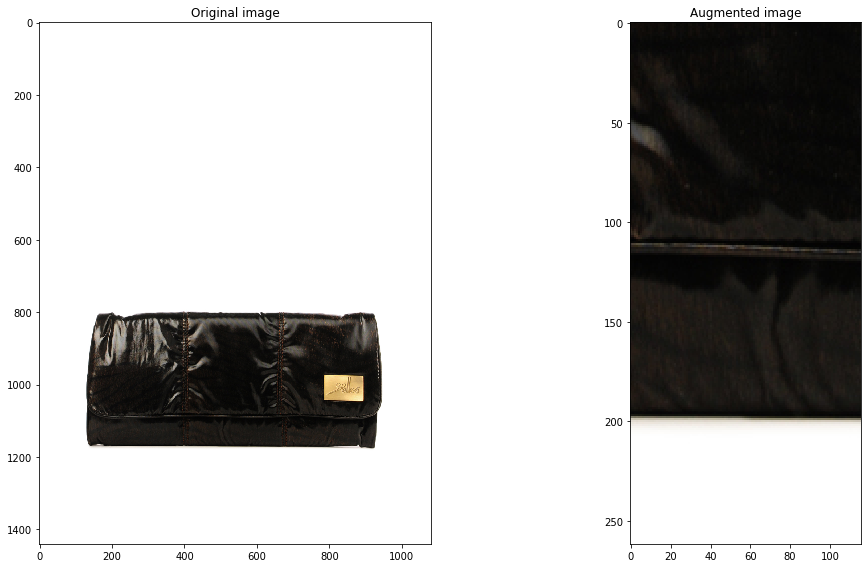

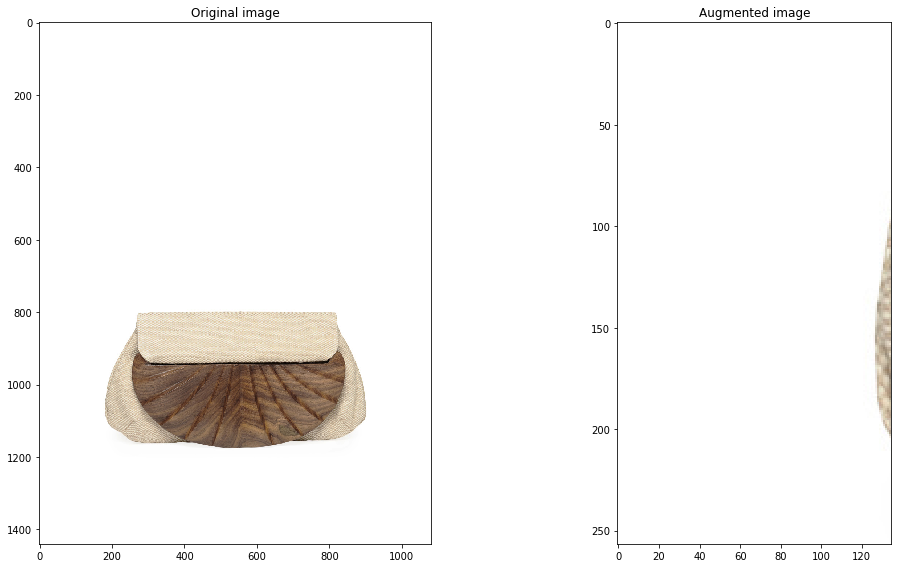

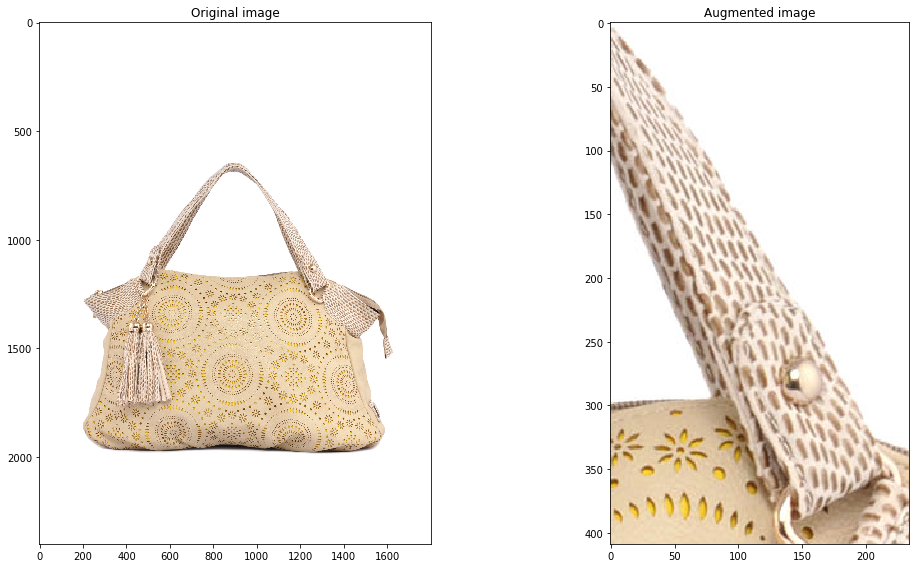

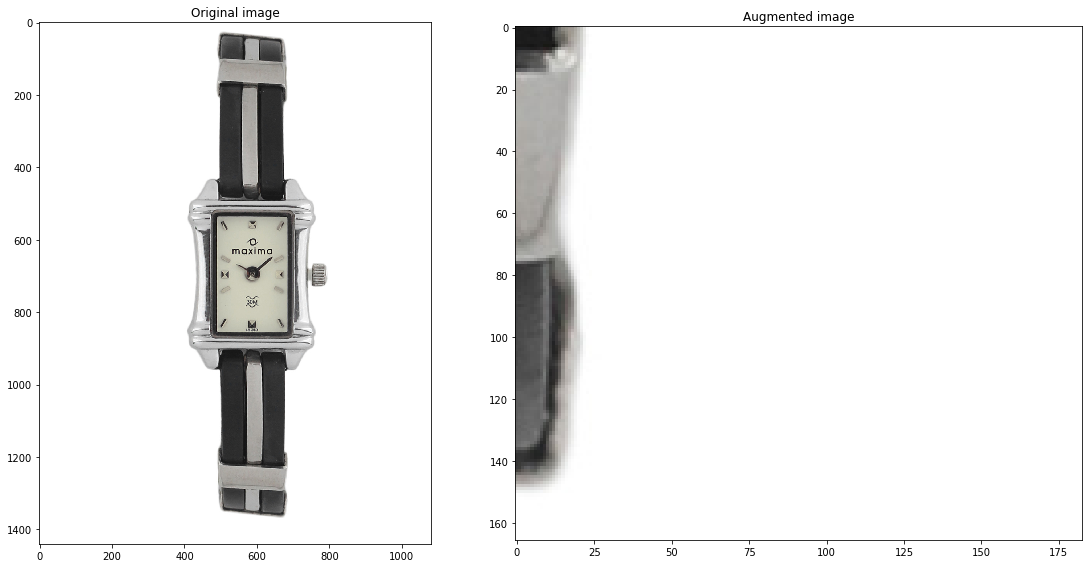

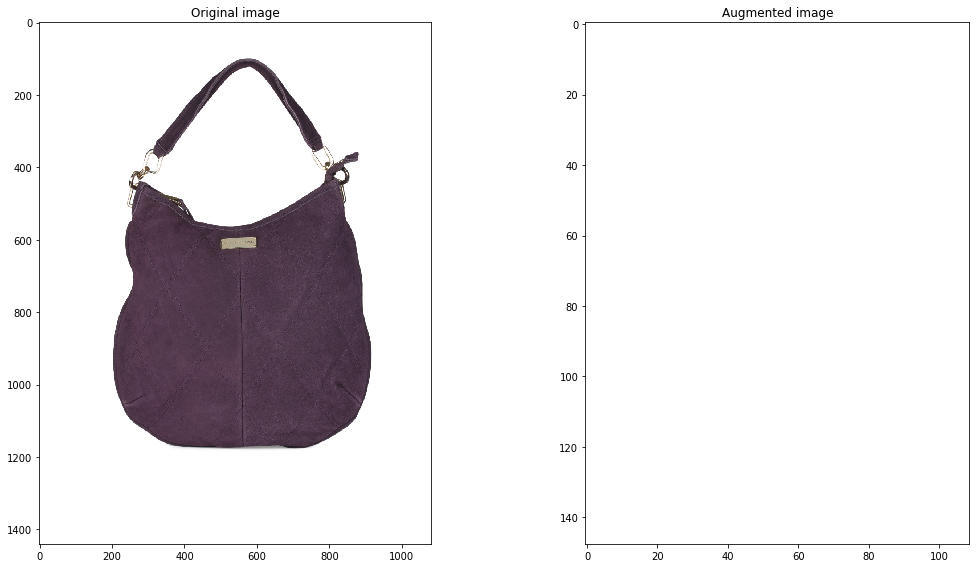

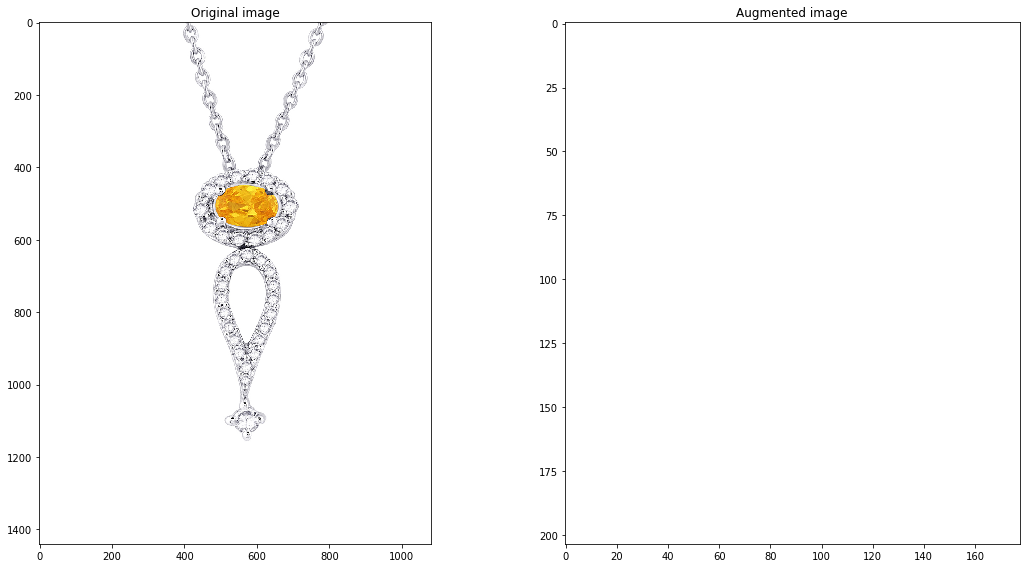

In [20]:
import random
random_images = random.sample(image_list,10)
for img in random_images:
    percent_h = random.uniform(0.1, 0.2)
    percent_w = random.uniform(0.1, 0.2)
    random_crop_transformation(img, percent_h, percent_w)

In [7]:
landmarks_config = '/home/olysavra/datasqueezer/data_pipeline/data_pipeline_processor/data_processor/data_transformator/pretrained_models/models_configs/landmark_detect_vgg.py'
folder_for_images_path = "/home/olysavra/datasqueezer/data_pipeline/data_pipeline_processor/data/download/SELECT_*_FROM_test_WHERE_gender='Women'_AND_masterCategory='Accessories'_AND_usage='Casual'"
checkpoints = '/home/olysavra/datasqueezer/data_pipeline/data_pipeline_processor/data_processor/data_transformator/pretrained_models/checkpoint/latest.pth'

In [8]:
path = add_landmarks(landmarks_config, folder_for_images_path, checkpoints)
print(path)

6992
detected landmarks: 1100.145149230957 1010.2452891213554 for image 16992
detected landmarks: 362.9423127855573 251.6704089300973 for image 48911
detected landmarks: 643.1775856018066 262.2611127580915 for image 48911
detected landmarks: 384.08498627798895 484.0167004721505 for image 48911
detected landmarks: 397.01064654758994 399.2539174216134 for image 58183
detected landmarks: 572.3201833452497 409.13226945059637 for image 58183
detected landmarks: 438.3633940560477 465.3045681544712 for image 58183
detected landmarks: 290.4458999633789 873.6889089856829 for image 18034
detected landmarks: 1329.2682102748327 902.5515624455044 for image 18034
detected landmarks: 417.74534838540217 1248.106098175049 for image 18034
detected landmarks: 561.7273398808071 1076.6792842320035 for image 17075
detected landmarks: 1072.2272464207242 1085.210977281843 for image 17075
detected landmarks: 656.4957005637033 1324.9332700456894 for image 17075
detected landmarks: 376.58107893807545 449.0609386

In [9]:
meta_data_update_query = append_meta_data_postgre.delay(META_DATA_UPDATE_QUERY, "/home/olysavra/datasqueezer/data_pipeline/data_pipeline_processor/data/download/SELECT_*_FROM_test_WHERE_gender='Women'_AND_masterCategory='Accessories'_AND_usage='Casual'")
meta_data_update_query.ready()
meta_data_update_query.get(timeout=10)